In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 데이터 분포 확인

In [58]:
train = pd.read_csv('/content/drive/MyDrive/dacon/집값예측경진대회/train.csv', sep=',', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/dacon/집값예측경진대회/test.csv', sep=',', encoding='cp949')

In [8]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [9]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [12]:
train.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [14]:
train.dtypes

id                 int64
Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

- Year Built : 완공 연도
- Year Remod/Add : 리모델링 연도
- Garage Yr Blt : 차고 완공 연도
- Overall Qual : 전반적 재료와 마감 품질
- Exter Qual : 외관 재료 품질
- Bsmt Qual : 지하실 높이
- Kitchen Qual : 부엌 품질
- Gr Liv Area : 지상층 생활 면적
- Total Bsmt SF : 지하실 면적
- 1st Fls SF : 1층 면적
- Garage Area : 차고 면적
- Full Bath : 지하층 화장실 갯수
- Garage Cars : 차고 자리 개수

In [16]:
numeric_feature = train.columns[(train.dtypes==int) | (train.dtypes== float)]
categorical_feature = train.columns[train.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['id', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


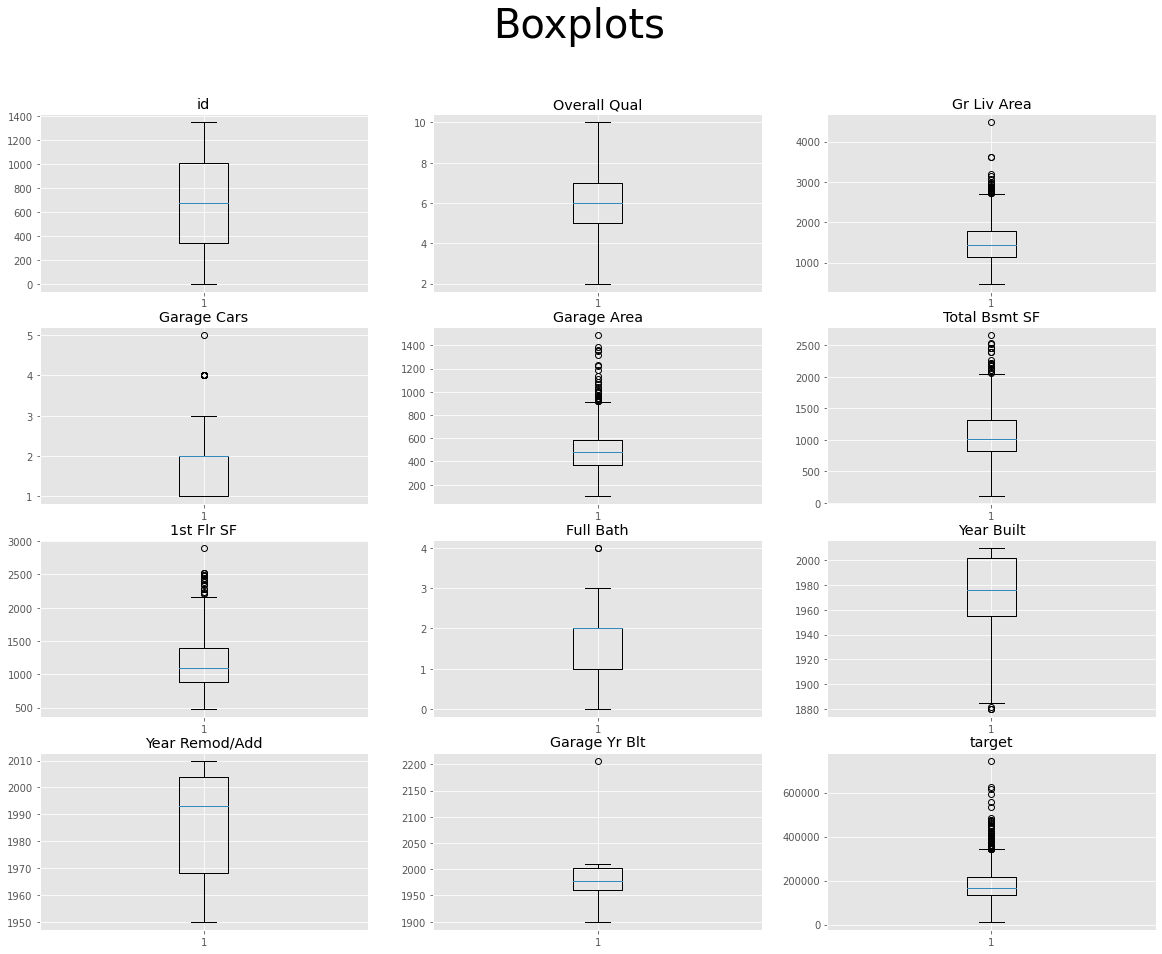

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train[feature[i]])
plt.show()

특정 변수는 이상치 많음

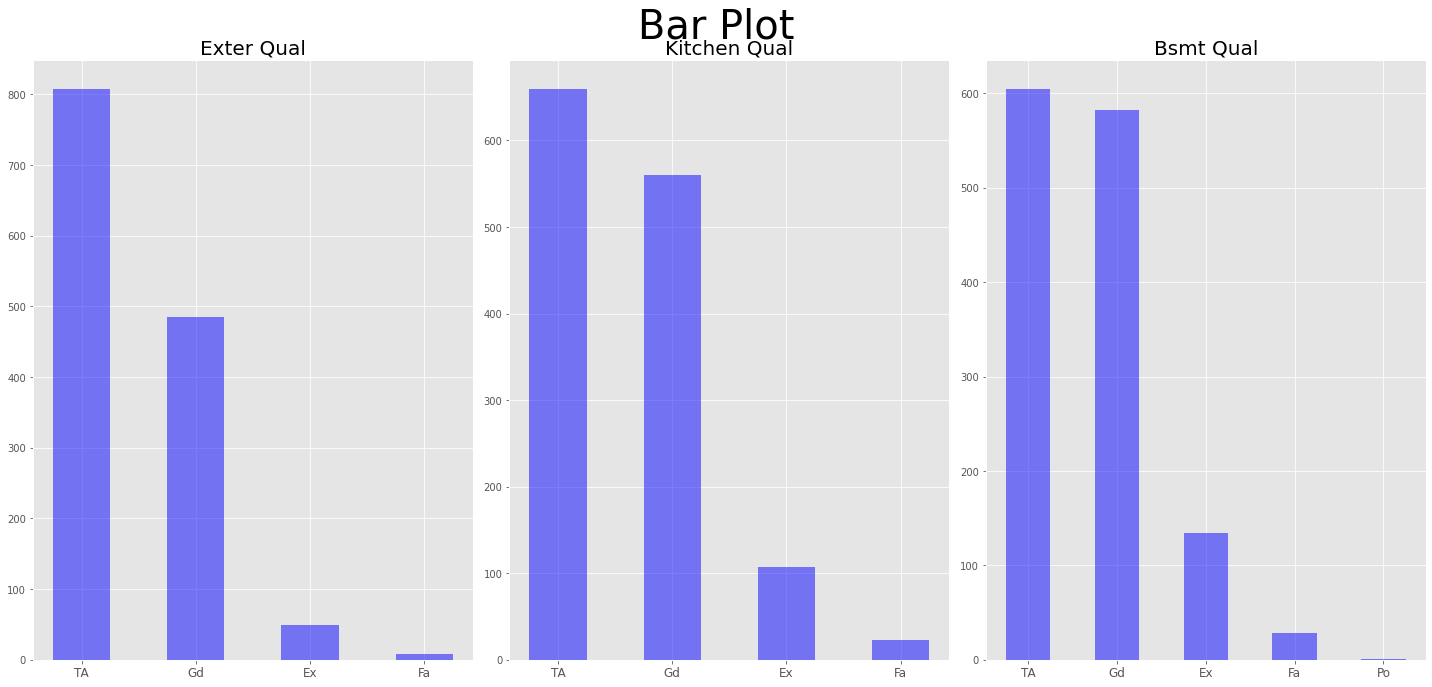

In [86]:
# 히스토그램
feature = categorical_feature

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

각 요소가 특정 값에 몰려있음

In [21]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

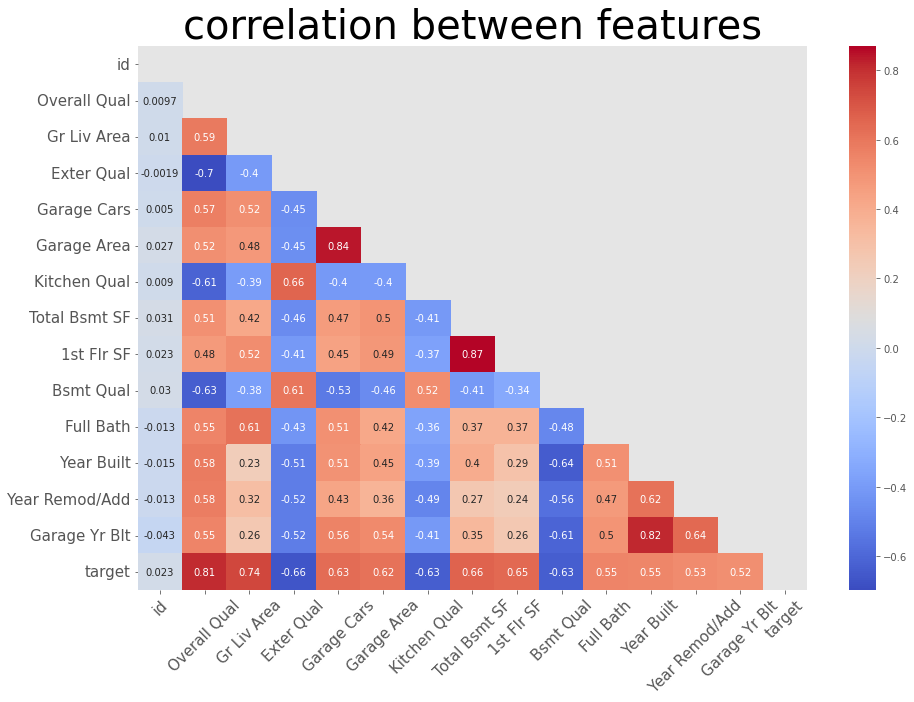

In [22]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- 0.81: Overall Qual(전반적 재료와 마감 품질)
- 0.74: Gr Liv Area(지상층 화장실 개수)
- 0.63: Garage Cars(차고 자리 개수)
- 0.65: 1st Flr Sf(1층 면적)
- 0.66 Total Bsmt Sf(지하실 면적)

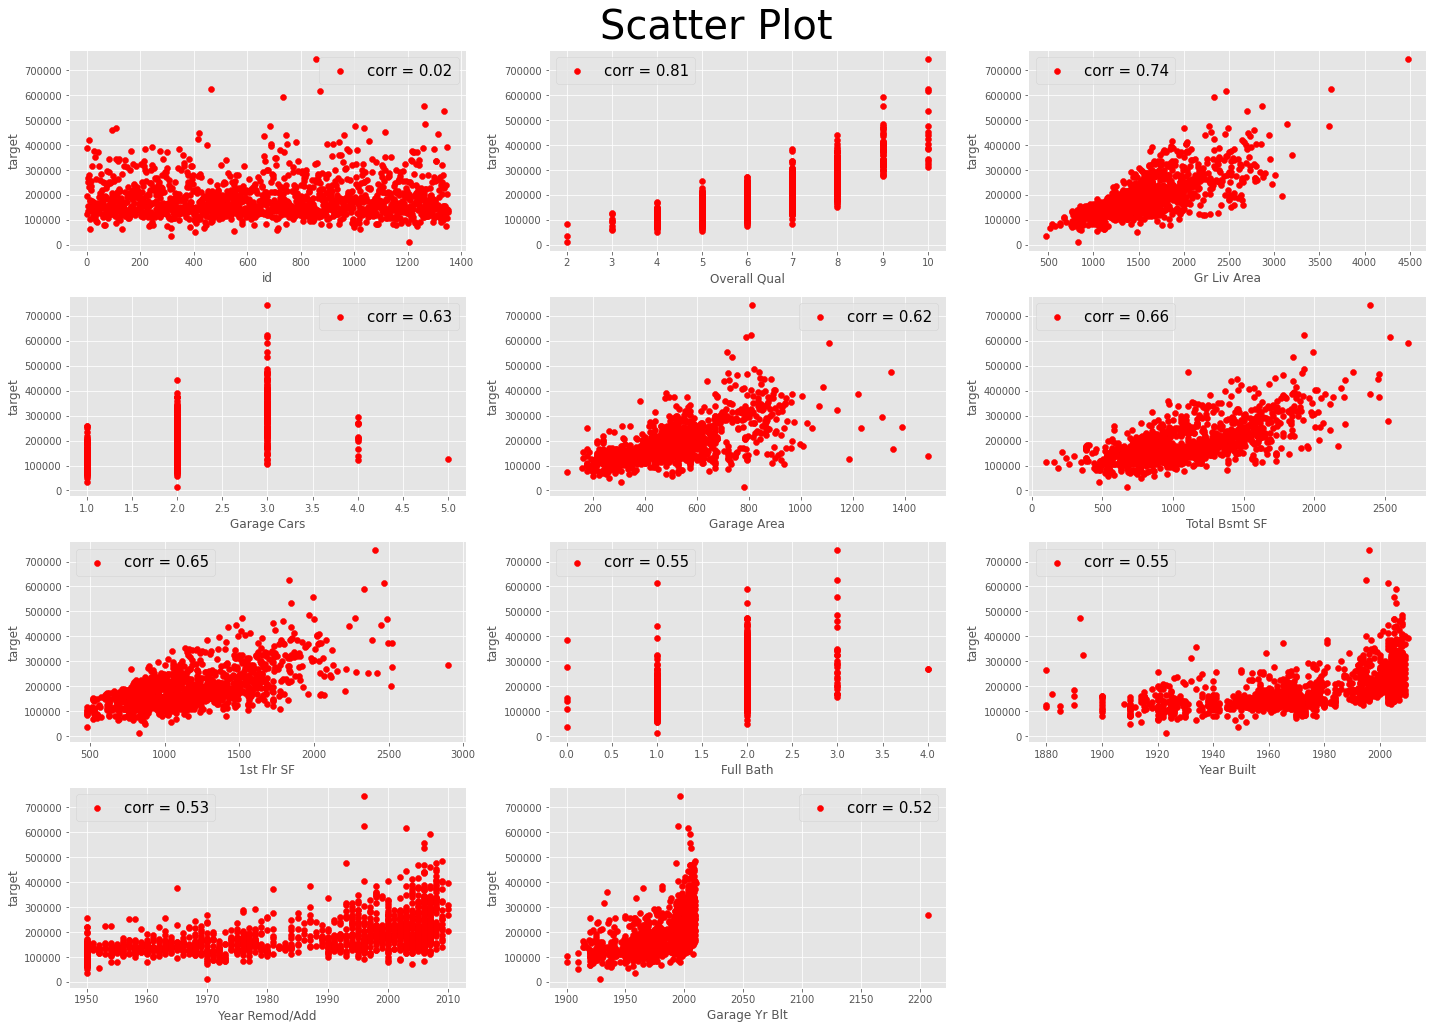

In [24]:
target = "target"

feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(train[feature[i]], train[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Overall Qual은 corr이 0.81로 매우 높은 상관관계를 보임(전반적 재료와 마감 품질)
- Gr Liv Area은 corr이 0.74로 두번째로 높은 상관관계를 보임(지상층 생활 면적)

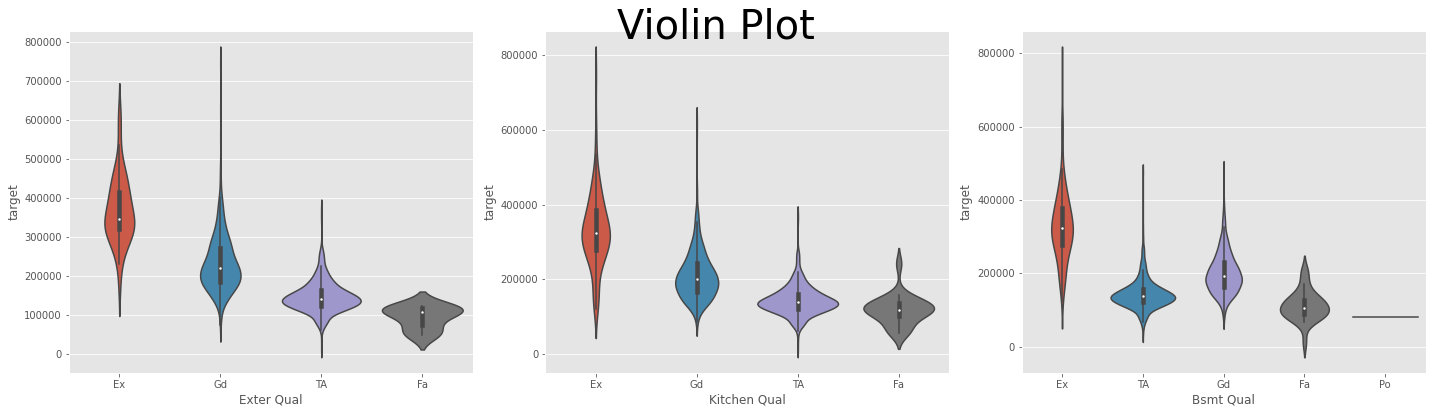

In [25]:
#바이올린 플롯(범주형 변수 분포)
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= train[feature[i]], y= train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ex 해당 값들이 상대적으로 높은 집값 분포

exter qual(외관 재료 품질), kitchenQual(부억 품질), BsmtQual(지하실 높이)

### 데이터 전처리

In [60]:
from numpy.core.defchararray import upper
def outliers(data, col):
  q1, q3 = np.percentile(data[col], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q1 + (iqr*1.5)
  
  return data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]

df = outliers(train, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])

이상치가 너무 많아 각 행 데이터 대부분 삭제 ㅠ -> 보류

In [69]:
train.corr().loc[target].abs().sort_values(ascending=False)

target            1.000000
Overall Qual      0.810607
Gr Liv Area       0.742061
Total Bsmt SF     0.664047
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
id                0.022934
Name: target, dtype: float64

In [102]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)